In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
train=pd.read_csv('dataset/train.csv')
test=pd.read_csv('dataset/test.csv')

In [3]:
train['music_genre'].unique()

array(['Jazz', 'Rap', 'Rock', 'Classical', 'Electronic', 'Country',
       'Hip-Hop'], dtype=object)

In [4]:
train.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [5]:
def process(data):
    myli=[]
    data=pd.concat([data,pd.get_dummies(data['key'])],axis=1).drop(['key'],axis=1)
    data=pd.concat([data,pd.get_dummies(data['voice_gender'])],axis=1).drop(['voice_gender'],axis=1)
    data=pd.concat([data,pd.get_dummies(data['mode'])],axis=1).drop(['mode'],axis=1)
    data=pd.concat([data,pd.get_dummies(data['musician_category'])],axis=1).drop(['musician_category'],axis=1)
    if('music_genre' in data.columns):
        le = preprocessing.LabelEncoder()
        genre=le.fit_transform(data['music_genre'])
        data=data.drop(['music_genre'],axis=1)
        genre
        myli.append(genre)

    data=data.drop(['track_name','instance_id'],axis=1)
    data.head()

    data.isnull().sum()

    tempo=data[data['tempo']!='?']['tempo']
    tempo=tempo.astype(float)
    sns.displot(x=tempo ,kind="kde")

    sns.displot(x=data['popularity'] ,kind="kde",color='red')

    sns.displot(x=data['danceability'] ,kind="kde",color='red')

    sns.displot(x=data['duration_ms'] ,kind="kde",color='green')

    data.columns

    for i in data.columns:
        tmp=data[data[i]=='?']
        tmp2=data[data[i]!='?']
        if(tmp.shape[0]>0):
            print(i)
            data=data.replace({i:{'?':tmp2[i].astype('float').mean()}})
        if(data[i].isnull().sum()>0):
            data[i]=data[i].fillna(data[i].mean())

    data.isnull().sum()
    print(data.shape)
    myli.append(data)
    return myli

tempo
(15681, 32)
tempo
(3921, 32)


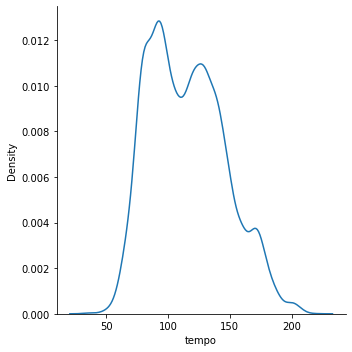

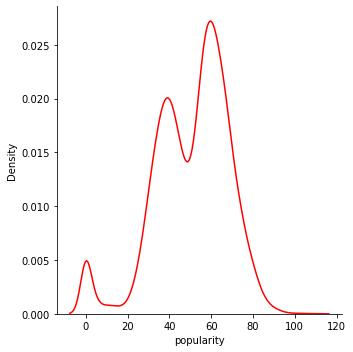

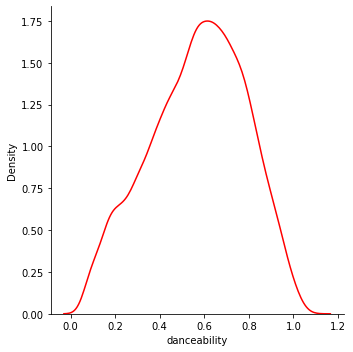

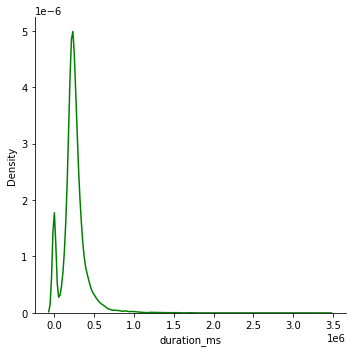

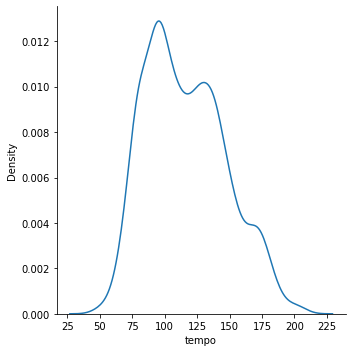

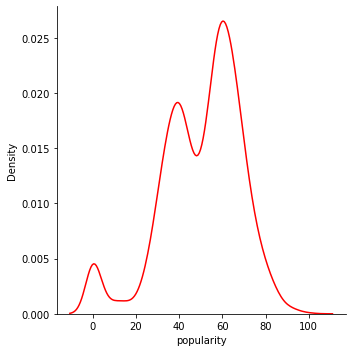

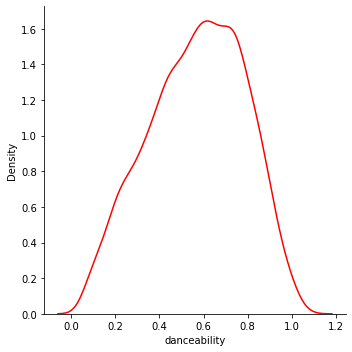

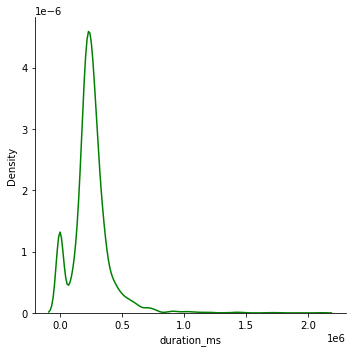

In [6]:
td=process(train)
train_data=td[1]
genre=td[0]
test_data=process(test)[0]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_data, genre, test_size=0.33, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
import xgboost as xgb
model=xgb.XGBClassifier(max_depth=15,n_estimators=100)
model.fit(np.asarray(X_train).astype(np.float32),np.asarray(y_train).astype(np.float32))

c:\users\16063\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:02:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
res=model.predict(X_test)

In [11]:
from sklearn.metrics import f1_score
f1_score(res,y_test,average='macro')

0.6169788781979559

In [12]:
####Running model on test data#########

In [13]:
res=model.predict(test_data)
res=res.astype(np.int)
res

array([0, 6, 6, ..., 0, 1, 2])

In [14]:
df=pd.DataFrame(train['music_genre'])
df['genre']=genre
df=df.drop_duplicates()
genre=list(df['genre'])
genre
music_genre=list(df['music_genre'])
music_genre

['Jazz', 'Rap', 'Rock', 'Classical', 'Electronic', 'Country', 'Hip-Hop']

In [15]:
dic={}
for i in range(len(genre)):
    dic[genre[i]]=music_genre[i]
dic

{4: 'Jazz',
 5: 'Rap',
 6: 'Rock',
 0: 'Classical',
 2: 'Electronic',
 1: 'Country',
 3: 'Hip-Hop'}

In [16]:
music_genre=[]
for i in res:
    music_genre.append(dic[i])
music_genre

['Classical',
 'Rock',
 'Rock',
 'Rock',
 'Jazz',
 'Rap',
 'Electronic',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Country',
 'Rap',
 'Rap',
 'Rock',
 'Classical',
 'Jazz',
 'Classical',
 'Rap',
 'Rap',
 'Rap',
 'Jazz',
 'Classical',
 'Rap',
 'Classical',
 'Rap',
 'Country',
 'Jazz',
 'Jazz',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Country',
 'Classical',
 'Jazz',
 'Classical',
 'Rock',
 'Rock',
 'Rock',
 'Jazz',
 'Rap',
 'Rap',
 'Classical',
 'Classical',
 'Rock',
 'Jazz',
 'Jazz',
 'Classical',
 'Jazz',
 'Rap',
 'Rock',
 'Classical',
 'Classical',
 'Rap',
 'Rap',
 'Rock',
 'Jazz',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Classical',
 'Classical',
 'Jazz',
 'Classical',
 'Jazz',
 'Rock',
 'Rap',
 'Rock',
 'Hip-Hop',
 'Classical',
 'Jazz',
 'Classical',
 'Classical',
 'Classical',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Jazz',
 'Classical',
 'Rock',
 'Jazz',
 'Rock',
 'Country',
 'Rock',
 'Rap',
 'Classical',
 'Jazz',
 'Classical',
 'Rock',
 'Classical',
 'Jazz',
 'Classical',
 'Rock

In [17]:
op=pd.DataFrame({'instance_id':test['instance_id'],'music_genre':music_genre})
op.to_csv('op.csv',index=False)